Exercício 3

In [100]:
!pip install pycountry pycountry-convert


In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from pycountry import countries
import pycountry_convert as pc

In [178]:
df = pd.read_csv('data/annual-temperature-anomalies.csv')
df.head()

,Entity,Code,Year,Temperature anomaly
0,Afghanistan,AFG,1940,-1.202316
1,Afghanistan,AFG,1941,0.794745
2,Afghanistan,AFG,1942,0.355437
3,Afghanistan,AFG,1943,-1.005242
4,Afghanistan,AFG,1944,-0.386346


In [179]:
alguns_paises = ['BRA', 'MEX', 'CHL', 'ECU', 'CAN', 'NOR']

# dataframe secundário com alguns países 
df2 = df[df['Code'].isin(alguns_paises)].copy()

df2.head()

,Entity,Code,Year,Temperature anomaly
2550,Brazil,BRA,1940,-0.765970
2551,Brazil,BRA,1941,-0.408445
2552,Brazil,BRA,1942,-0.720680
2553,Brazil,BRA,1943,-1.458900
2554,Brazil,BRA,1944,-0.696214


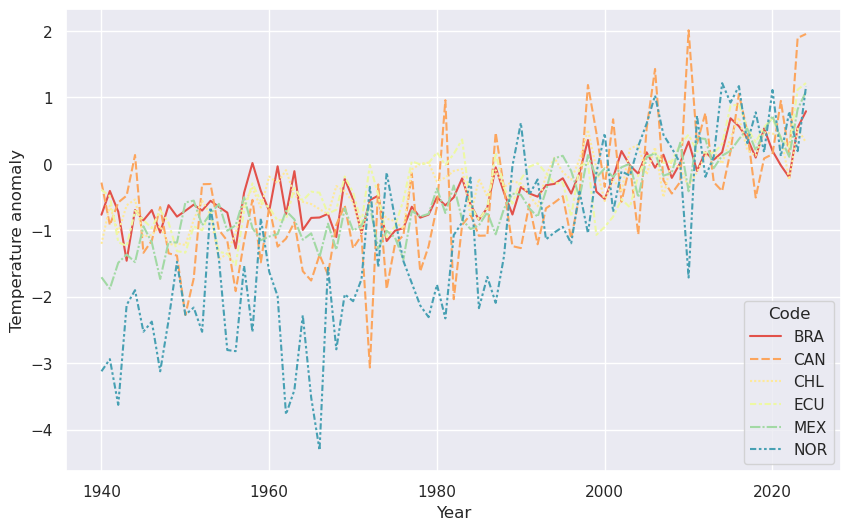

In [180]:
from matplotlib.ticker import MaxNLocator
sns.set_theme(style="darkgrid")

plt.figure(figsize=(10,6))

ax = sns.lineplot(  
    x="Year", y="Temperature anomaly",
    palette="Spectral",
    hue="Code", 
    style="Code",
    data=df2)

plt.xticks([1940, 1960, 1980, 2000, 2020])
plt.show()

In [181]:
fig = px.line(
    df2,
    x="Year",
    y="Temperature anomaly",
    line_dash="Code",
    color="Code",
    title="Anomalias de Temperatura por País ao longo dos anos",
    labels={"Temperature anomaly": "Anomalia de Temperatura (°C)", "Year": "Ano"},
    width=1000,
    height=600,
    template="plotly_dark",
)

fig.update_layout(
    xaxis=dict(
        #tickvals=[1940, 1960, 1980, 2000, 2020],  anos específicos no eixo X  ~ ñão é necessário
        showgrid=True
    ),
    yaxis=dict(
        showgrid=True
    )
)

fig.show()

In [182]:
fig = px.line(
    df2,
    x="Year",
    y="Temperature anomaly",
    #line_dash="Code",
    color="Code",
    title="Anomalias de Temperatura por País ao longo dos anos",
    labels={"Temperature anomaly": "Anomalia de Temperatura (°C)", "Year": "Ano"}, #muda o nome do eixo, caso contrário fica o nome da coluna
    width=1000,
    height=600,
    template="plotly_dark",
)

fig.update_layout(
    xaxis=dict(
        showgrid=True
    ),
    yaxis=dict(
        showgrid=True
    )
)

fig.show()

/tmp/ipykernel_5627/1948387845.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




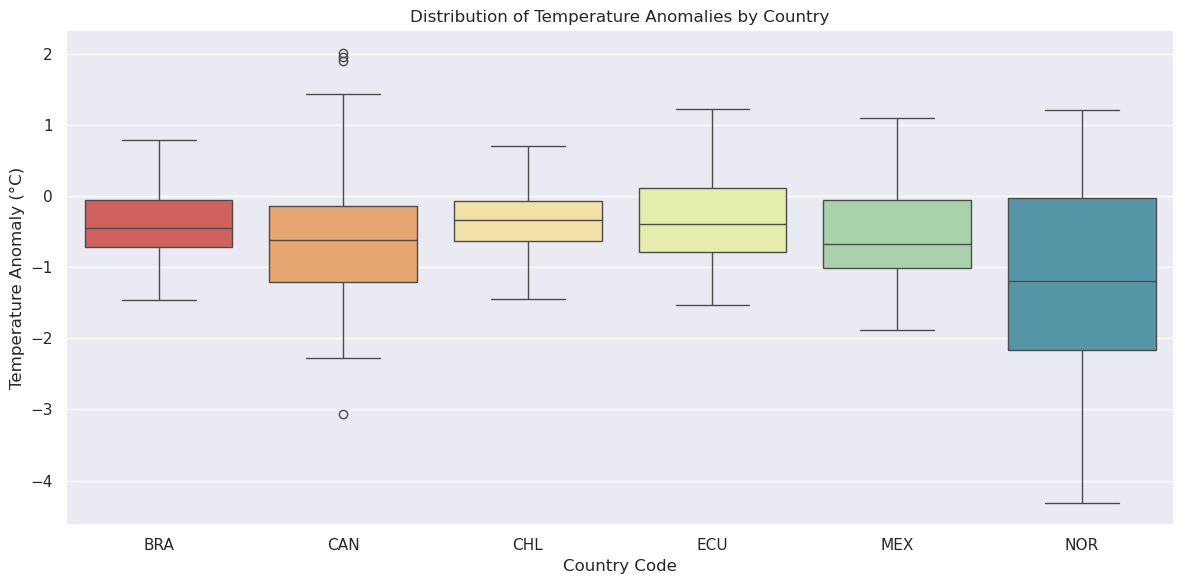

In [ ]:
plt.figure(figsize=(12, 6))

ax = sns.boxplot(
    x="Code", 
    y="Temperature anomaly",
    data=df2,
    palette="Spectral",
    
)


plt.title("Distribution of Temperature Anomalies by Country")
plt.xlabel("Country Code")
plt.ylabel("Temperature Anomaly (°C)")
#plt.xticks(rotation=45)  

# Show the plot
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

In [ ]:
fig = px.scatter(
    df2,
    x="Year",
    y="Temperature anomaly",
    color="Code",               # atribui uma cor para cada país
    hover_name="Code",          #  o nome do país ao passar o mouse
    title="Anomalias de Temperatura por País ao Longo do Tempo",
    labels={"Temperature anomaly": "Anomalia (°C)", "Year": "Ano"},
    width=1000,
    height=600,
    template="plotly_dark",  
    trendline="ols",  # adiciona a linha de tendência para cada grupo de pontos
)

# Personalizar tooltip (informações ao passar o mouse)
fig.update_traces(
    hovertemplate="<b>%{hovertext}</b><br>Ano: %{x}<br>Anomalia: %{y}°C",
    marker=dict(size=10, opacity=0.7, line=dict(width=1, color="white"))
)




fig.show()

In [ ]:
from scipy import stats
fig = px.scatter(
    df2,
    x="Year",
    y="Temperature anomaly",
    color="Code",               # atribui uma cor para cada país
    hover_name="Code",          #  o nome do país ao passar o mouse
    title="Anomalias de Temperatura por País ao Longo do Tempo",
    labels={"Temperature anomaly": "Anomalia (°C)", "Year": "Ano"},
    width=1000,
    height=600,
    template="plotly_dark",  
    #trendline="ols", adiciona a linha de tendência para cada grupo de pontos   
)

x = df2["Year"]
y = df2["Temperature anomaly"]
slope, intercept, _, _, _ = stats.linregress(x, y)
fig.add_scatter(
    x=x,
    y=slope*x + intercept,
    mode='lines',
    name='Tendência Global',
    line=dict(color='yellow', width=4, dash='solid'),
    hoverinfo='skip')

fig.update_traces(
    hovertemplate="<b>%{hovertext}</b><br>Ano: %{x}<br>Anomalia: %{y}°C",
    marker=dict(size=10, opacity=0.7, line=dict(width=1, color="white"))
)


fig.show()

In [172]:
fig = px.box(
    df2,
    x="Code",  
    y="Temperature anomaly", 
    title="Distribuição das Anomalias de Temperatura por País",
    labels={"Temperature anomaly": "Anomalia de temperatura (°C)", "Code": "País"},
    width=1000,
    height=600,
    template="plotly_dark",
    color="Code",  # atribui uma cor para cada país
)

fig.update_layout(
    xaxis=dict(
        title="Country",
        #tickangle=45  não precisa, tem espaço o suficiente 
    ),
    yaxis=dict(
        title="Temperature Anomaly (°C)"
    ),
    showlegend=False,  # já tem legenda no eixo
    #plot_bgcolor='rgba(240,240,240,0.8)'  só se eu quiser mudar o fundo do gráfico
)

fig.update_traces(
    boxpoints='all',  
    pointpos=0,  
    marker=dict(
        size=4,
        opacity=0.5  
    ),
    line=dict(width=1.5)  
)

fig.show()

In [176]:
fig = px.box(
    df,
    x="Code",  
    y="Temperature anomaly", 
    title="Distribuição das Anomalias de Temperatura por País",
    labels={"Temperature anomaly": "Anomalia de temperatura (°C)", "Code": "País"},
    width=2500,
    height=600,
    template="plotly_dark",
    color="Code",  # atribui uma cor para cada país
)

fig.update_layout(
    xaxis=dict(
        title="Country",
        #tickangle=45  não precisa, tem espaço o suficiente 
    ),
    yaxis=dict(
        title="Anomalia de temperatura (°C)"
    ),
    showlegend=False,  # já tem legenda no eixo
    #plot_bgcolor='rgba(240,240,240,0.8)'  só se eu quiser mudar o fundo do gráfico
)

fig.update_traces(
    #boxpoints='all',  
    pointpos=0,  
    marker=dict(
        size=4,
        opacity=0.5  
    ),
    line=dict(width=1.5)  
)

fig.show()

In [ ]:
#  gráfico de violino
fig = px.violin(
    df2,
    y="Temperature anomaly",
    x="Code",  
    color="Code",
    title="Distribuição das Anomalias de Temperatura por País",
    labels={"Temperature anomaly": "Anomalia de Temperatura (°C)", "Code": "País"},
    box=False,  #sem obox dentro
    hover_data=["Year"],
    width=1000,
    height=600,
    template = 'plotly_dark'
)

# Personalizar o layout
fig.update_layout(
    xaxis=dict(title="País"),
    yaxis=dict(title="Anomalia de Temperatura (°C)"),
    showlegend=False,  
      
)

# Personalizar os violinos
fig.update_traces(
    meanline_visible=True,  # Mostra linha da média
    #spanmode="hard",  # Define os limites dos violinos
    width=0.9,  # Largura dos violinos
    marker=dict(
        size=3,
        opacity=0.5
    ),
    line=dict(width=1),
    jitter=0.1  # Espaçamento entre pontos
)

# Adicionar linha de referência em y=0
fig.add_hline(
    y=0,
    line_dash="dot",
    line_color="gray"
)

fig.show()

In [155]:
df_ano = df[df['Year'] == 1940]

# Criar o mapa cloroplético
fig = px.choropleth(
    df_ano,
    locations="Code",            # Códigos de países (ISO Alpha-3)
    color="Temperature anomaly", # Valores para colorir
    hover_name="Code",           # Mostra ao passar o mouse
    color_continuous_scale="RdBu_r",  # Escala de cores (vermelho-azul invertido)
    range_color=[df2['Temperature anomaly'].min(),  # Range fixo para comparação
                 df2['Temperature anomaly'].max()],
    title=f"Anomalias de Temperatura por País",
    labels={"Temperature anomaly": "Anomalia (°C)"},
    template = "plotly_dark",
    width=1000,
    height=600
)

# Configurações adicionaisplot_bgcolor="white",
fig.update_geos(
    showcountries=True, 
    countrycolor="Black",
    showcoastlines=True,
    coastlinecolor="Black"
)

fig.update_layout(
    geo=dict(
        showframe=False,
        showocean=True,
        oceancolor="LightBlue",
        projection_type="natural earth"
    ),
    coloraxis_colorbar=dict(
        title="Anomalia (°C)",
        thickness=20,
        len=0.75
    )
)

fig.show()


In [171]:
df_sorted = df.sort_values('Year') # essa linha **aqui** não é muito necessário pq o dataset já está em ordem 

fig = px.choropleth( # Cria o mapa 
    df_sorted,
    locations="Code",
    color="Temperature anomaly",
    animation_frame="Year",  # A variável é o ano
    color_continuous_scale="RdBu_r", #útil pra temperatura 
    range_color=[df['Temperature anomaly'].min(), 
                 df['Temperature anomaly'].max()],
    title="Anomalias de Temperatura por País (1940-2023)",
    labels={"Temperature anomaly": "Anomalia (°C)", "Year": "Ano"},
    width=1000,
    height=600,
    template = "plotly_dark",
    projection="natural earth"
)

# Configurações do mapa
fig.update_geos(
    showcountries=True,
    countrycolor="Black",
    showcoastlines=True,
    coastlinecolor="Black",
    showocean=True,
    oceancolor="LightBlue"
)

# Configurações da animação
fig.update_layout(
    geo=dict(
        showframe=False,
        landcolor="LightGrey"
    ),
    coloraxis_colorbar=dict(
        title="Anomalia (°C)",
        thickness=20,
        len=0.75
    ),
    updatemenus=[{
        "buttons": [
            {
                "args": [None, {"frame": {"duration": 300, "redraw": True}, 
                              "fromcurrent": True, "mode": "immediate"}],
                "label": "Play",
                "method": "animate"
            },
            {
                "args": [[None], {"frame": {"duration": 0, "redraw": False}, 
                                "mode": "immediate",
                                "transition": {"duration": 0}}],
                "label": "Pause",
                "method": "animate"
            }
        ],
        "direction": "left",
        "pad": {"r": 10, "t": 10},
        "type": "buttons",
        "x": 0.1,
        "y": 0
    }]
)

# Ajustar os frames para uma transição suave
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 300
#fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 150

# Melhorar a exibição dos anos no slider
fig.layout.sliders[0].currentvalue = {
    "prefix": "Ano: ",
    "font": {"size": 14}
}

fig.show()

In [ ]:

# Filtrar o DataFrame para o ano específico e calcular a mediana por país
df_mediana = df[df['Year'] == 2022].groupby('Code')['Temperature anomaly'].median().reset_index()

# Renomear a coluna para clareza
df_mediana = df_mediana.rename(columns={'Temperature anomaly': 'mediana_anomalia'})

# Ordenar do maior aquecimento para o maior resfriamento
df_mediana = df_mediana.sort_values('mediana_anomalia', ascending=False)

# Mostrar o resultado
print(df_mediana)

    Code  mediana_anomalia
4    AND          1.773571
31   CHE          1.531639
173  TJK          1.456590
109  MAR          1.349955
61   FRA          1.316368
..   ...               ...
182  URY         -0.308690
163  SUR         -0.327890
28   BWA         -0.335435
146  PYF         -0.487433
97   KIR         -0.582847

[195 rows x 2 columns]


In [159]:
fig = px.area(
    df2,
    x="Year",
    y="Temperature anomaly",
    color="Code",
    pattern_shape="Code",
    title="Evolução das Anomalias de Temperatura",
    labels={"Temperature anomaly": "Anomalia de Temperatura (°C)", "Year": "Ano"},
    width=1000,
    height=600,
    template="plotly_dark",
)


fig.update_layout(
    xaxis=dict(
        tickmode='linear',
        dtick=10, # 
        showgrid=True
    ),
    yaxis=dict(
        title="Anomalia de Temperatura (°C)",
        showgrid=True
    ),
    legend=dict(
        title="Países",
        orientation="h",  # Legenda horizontal
        yanchor="bottom",
        y=0.02,  
        xanchor="right",
        x=1
    ),
    hovermode="x unified"  # Mostra todos os valores quando passa o mouse
)

# Configurações das áreas
fig.update_traces(
    line=dict(width=0.5),
    hovertemplate="<b>%{color}</b><br>Ano: %{x}<br>Anomalia: %{y}°C<extra></extra>"
)

fig.show()

In [161]:
# o dataset origial tem os códigos iso3, mas o pycountry-convert usa os códigos iso2 então a função abaixo converte os códigos iso3 para iso2
# e a função get_continent converte o código iso2 para o nome do continente
# essas funções são para adicionar as colunas 'iso2' e 'Continent'
def alpha3_to_alpha2(iso3_code):
    try:
        return countries.get(alpha_3=iso3_code).alpha_2
    except:
        return None

def get_continent(alpha2):
    try:
        continent_code = pc.country_alpha2_to_continent_code(alpha2)
        return pc.convert_continent_code_to_continent_name(continent_code)
    except:
        return None

df['iso2'] = df['Code'].apply(alpha3_to_alpha2)
df['Continent'] = df['iso2'].apply(get_continent)

In [ ]:
# coluna dw dados por continente e média anual
df_continent = df.groupby(['Continent', 'Year'], as_index=False)['Temperature anomaly'].mean()

# faz o graf. timeseries 
fig = px.line(
    df_continent,
    x='Year',
    y='Temperature anomaly',
    color='Continent',
    title='Evolução das Anomalias de Temperatura por Continente',
    labels={'Temperature anomaly': 'Anomalia de Temperatura (°C)', 'Year': 'Ano'},
    width=1000,
    height=600,
    template='plotly_dark', 
    line_shape='linear',
    #line_dash='Continent' -- sem dash fica feio, com dash fica horroroso
) 

fig.update_layout(
    xaxis=dict(
        tickmode='linear',
        dtick=10,  
        showgrid=True,
        gridcolor='lightgray'
    ),
    yaxis=dict(
        title='Anomalia de Temperatura (°C)',
        showgrid=True,
        zeroline=True,
        zerolinecolor='gray'
    ),
    hovermode='x unified'  # nostra todos os continentes ao passar o mouse
)



fig.show()